# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lons = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
        
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()
       
        # Parse out latitude, longitude, max temp, 
        #humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lon = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind_speed = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat,
                           "Lon": city_lon,
                           "Max Temp" : city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind_speed,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | evanston
Processing Record 4 of Set 1 | quellon
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | tubarjal
Processing Record 8 of Set 1 | bell ville
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | agat village
Processing Record 11 of Set 1 | ilovlya
Processing Record 12 of Set 1 | papao
Processing Record 13 of Set 1 | teguise
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | frontera
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | cestas
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | marquette
Processing Record 22 of Set 1 | olonkinbyen
Processing Recor

Processing Record 39 of Set 4 | tofol
Processing Record 40 of Set 4 | okhotsk
Processing Record 41 of Set 4 | port alfred
Processing Record 42 of Set 4 | inarajan village
Processing Record 43 of Set 4 | balaruc-les-bains
Processing Record 44 of Set 4 | nanao
Processing Record 45 of Set 4 | guiuan
Processing Record 46 of Set 4 | kharp
Processing Record 47 of Set 4 | floro
Processing Record 48 of Set 4 | carutapera
Processing Record 49 of Set 4 | fada n'gourma
Processing Record 0 of Set 5 | mount isa
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | longmen
Processing Record 3 of Set 5 | imbituba
Processing Record 4 of Set 5 | nagqu
Processing Record 5 of Set 5 | atafu village
Processing Record 6 of Set 5 | murudeshwara
Processing Record 7 of Set 5 | blackmans bay
Processing Record 8 of Set 5 | kannur
Processing Record 9 of Set 5 | ust-nera
Processing Record 10 of Set 5 | aktau
Processing Record 11 of Set 5 | kodiak
Processing Record 12 of Set 5 | san patricio
Process

Processing Record 19 of Set 8 | new norfolk
Processing Record 20 of Set 8 | sebis
Processing Record 21 of Set 8 | san antonio de pale
Processing Record 22 of Set 8 | salinas
Processing Record 23 of Set 8 | puerto san jose
Processing Record 24 of Set 8 | tekeli
Processing Record 25 of Set 8 | enewetak
Processing Record 26 of Set 8 | port alberni
Processing Record 27 of Set 8 | palmer
Processing Record 28 of Set 8 | hacienda la calera
Processing Record 29 of Set 8 | al mijlad
Processing Record 30 of Set 8 | morant bay
Processing Record 31 of Set 8 | koulikoro
Processing Record 32 of Set 8 | orapa
Processing Record 33 of Set 8 | minas de marcona
Processing Record 34 of Set 8 | n'zeto
Processing Record 35 of Set 8 | busayra
Processing Record 36 of Set 8 | lompoc
Processing Record 37 of Set 8 | port-gentil
Processing Record 38 of Set 8 | labrador city
Processing Record 39 of Set 8 | kamaishi
Processing Record 40 of Set 8 | dubbo
Processing Record 41 of Set 8 | yasnyy
Processing Record 42 of

Processing Record 4 of Set 12 | crane
Processing Record 5 of Set 12 | suai
City not found. Skipping... 'coord'
Processing Record 6 of Set 12 | dolores
Processing Record 7 of Set 12 | san sebastian de la gomera
Processing Record 8 of Set 12 | middelburg
Processing Record 9 of Set 12 | kattivakkam
Processing Record 10 of Set 12 | tayshet
Processing Record 11 of Set 12 | chos malal
Processing Record 12 of Set 12 | hakui
Processing Record 13 of Set 12 | ocean city
Processing Record 14 of Set 12 | vorkuta
Processing Record 15 of Set 12 | ginir
Processing Record 16 of Set 12 | zhanaozen
Processing Record 17 of Set 12 | saratamata
City not found. Skipping... 'coord'
Processing Record 18 of Set 12 | prado
Processing Record 19 of Set 12 | goundi
Processing Record 20 of Set 12 | syevyerodonets'k
Processing Record 21 of Set 12 | weno
Processing Record 22 of Set 12 | metlili chaamba
Processing Record 23 of Set 12 | carolina beach
Processing Record 24 of Set 12 | neya
Processing Record 25 of Set 12

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lon           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,3.42,66,0,12.60,GL,1693711907
1,aasiaat,68.7098,-52.8699,0.60,82,99,5.99,GL,1693711908
2,evanston,42.0411,-87.6901,25.62,59,19,2.68,US,1693711761
3,quellon,-43.1167,-73.6167,3.14,93,20,1.03,CL,1693711909
4,port-aux-francais,-49.3500,70.2167,3.60,91,98,10.83,TF,1693711909


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,3.42,66,0,12.60,GL,1693711907
1,aasiaat,68.7098,-52.8699,0.60,82,99,5.99,GL,1693711908
2,evanston,42.0411,-87.6901,25.62,59,19,2.68,US,1693711761
3,quellon,-43.1167,-73.6167,3.14,93,20,1.03,CL,1693711909
4,port-aux-francais,-49.3500,70.2167,3.60,91,98,10.83,TF,1693711909


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

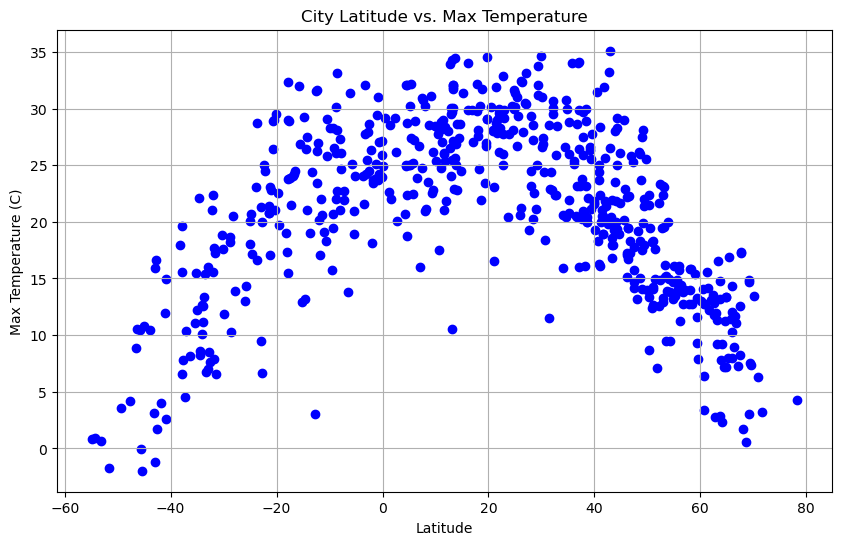

In [16]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', color='b')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

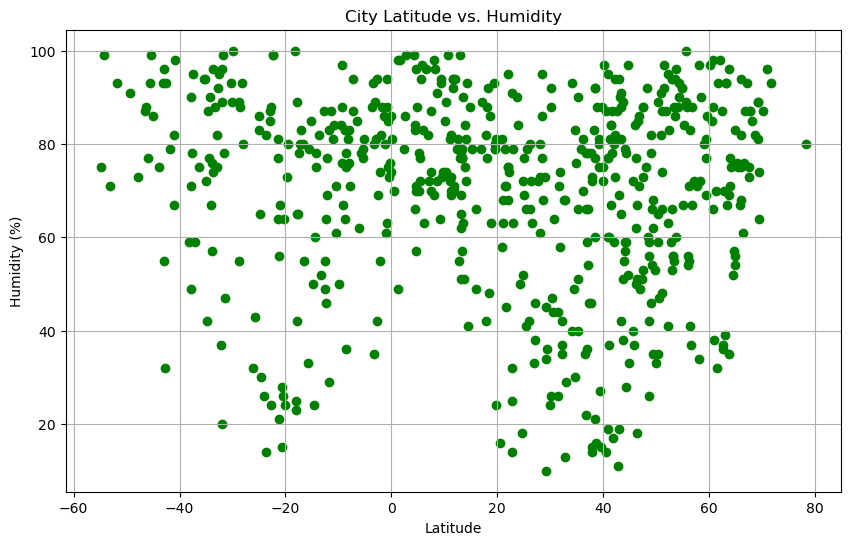

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', color='g')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

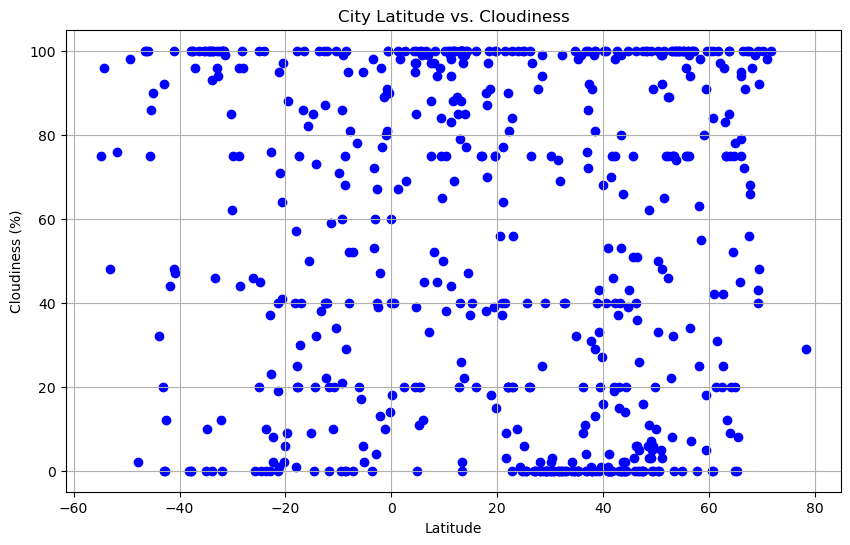

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color='b')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

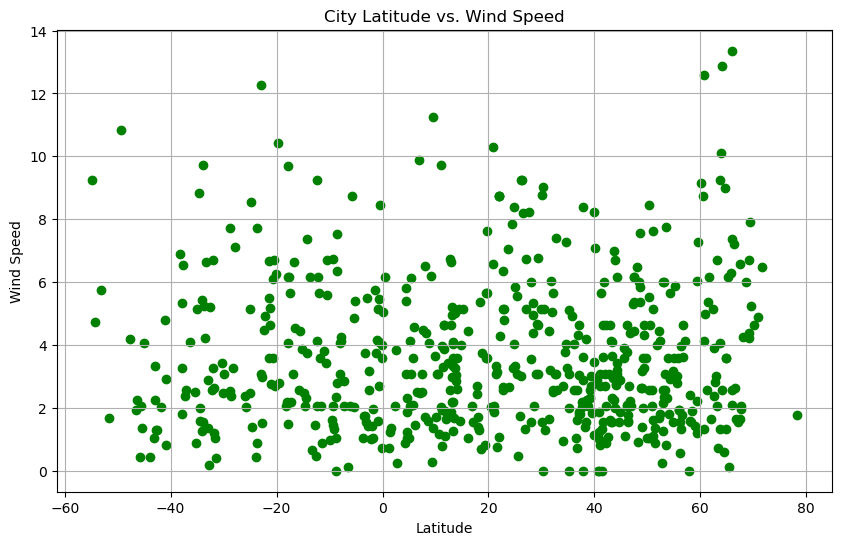

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', color='g')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df["Max Temp"])

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE